## Programming for Data Science Assignment-I

#### Git-hub: https://github.com/nimesh2091/Stock-Market-Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [3]:
stocks = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')

In [4]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
Date      93612 non-null object
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [5]:
stocks.dropna(inplace=True)

In [6]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93587 entries, 0 to 93611
Data columns (total 7 columns):
Date      93587 non-null object
Open      93587 non-null float64
High      93587 non-null float64
Low       93587 non-null float64
Close     93587 non-null float64
Volume    93587 non-null int64
Name      93587 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
import datetime as dt
def year_stock(stock):
    stock = dt.datetime.strptime(stock, "%Y-%m-%d")
    return(stock.year)

def month_stock(stock):
    stock = dt.datetime.strptime(stock, "%Y-%m-%d")
    return(stock.month)

def date_stock(stock):
    stock = dt.datetime.strptime(stock, "%Y-%m-%d")
    return(stock.day)

stocks['Year']= list(map(year_stock,stocks['Date']))
stocks['Month']= list(map(month_stock,stocks['Date']))
stocks['dd']= list(map(date_stock,stocks['Date']))

In [8]:
stocks.head()

,Date,Open,High,Low,Close,Volume,Name,Year,Month,dd
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006,1,3
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006,1,4
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006,1,5
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006,1,6
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006,1,9


In [9]:
daily_return = pd.DataFrame()
for i in stocks['Name'].unique():
    data = stocks[stocks['Name']==i][['Name','Date','Close']]
    data['daily_return'] = data['Close'].diff(1)
    daily_return = daily_return.append(data)
stocks['daily_return'] = daily_return['daily_return']

In [10]:
stocks.fillna(value=0,inplace=True)

In [28]:
stocks.head()

,Date,Open,High,Low,Close,Volume,Name,Year,Month,dd,daily_return,Type
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006,1,3,0.00,manufacturing/earth
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006,1,4,-0.40,manufacturing/earth
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006,1,5,-0.72,manufacturing/earth
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006,1,6,0.64,manufacturing/earth
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006,1,9,0.39,manufacturing/earth


In [11]:
stocks['Name'].unique()

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [12]:
def type(stock):
    if stock in ('BA','UTX'):
        return('aircraft manufacturing')
    
    elif stock in ('HD','WMT'):
        return('ecom/retail')
    
    elif stock == 'DIS':
        return('entertainment')
    
    elif stock in ('AABA','AXP','GS','JPM'):
        return('financial services')
    
    elif stock in ('NKE','MCD','KO'):
        return('FMCG')
    
    elif stock == 'TRV':
        return('insurance')
    
    elif stock in ('AMZN','AAPL','CSCO','GOOGL','IBM','MSFT'):
        return('IT')
    
    elif stock in ('GE','INTC'):
        return('manufacturing/elec')
    
    elif stock in ('CAT','MMM'):
        return('manufacturing/earth')
    
    elif stock in ('CVX','XOM'):
        return('Oil')
    
    elif stock in ('JNJ','MRK','PG','PFE','UNH'):
        return('manufacturing/Pharma')
    
    elif stock in ('VZ'):
        return('Telecom')
    
    else:
        return('N/A')
stocks['Type']= list(map(type,stocks['Name']))

### I - Performance of IT stocks over the years

In [13]:
trace_google = go.Scatter(
                x=stocks[stocks['Name'] == 'GOOGL'].Date,
                y=stocks[stocks['Name'] == 'GOOGL'].High,
                name = "GOOGL",
                opacity = 0.8)

trace_amazon = go.Scatter(
                x=stocks[stocks['Name'] == 'AMZN'].Date,
                y=stocks[stocks['Name'] == 'AMZN'].High,
                name = "AMZN",
                opacity = 0.8)

trace_apple = go.Scatter(
                x=stocks[stocks['Name'] == 'AAPL'].Date,
                y=stocks[stocks['Name'] == 'AAPL'].High,
                name = "AAPL",
                opacity = 0.8)

trace_cisco = go.Scatter(
                x=stocks[stocks['Name'] == 'CSCO'].Date,
                y=stocks[stocks['Name'] == 'CSCO'].High,
                name = "CSCO",
                opacity = 0.8)

trace_IBM = go.Scatter(
                x=stocks[stocks['Name'] == 'IBM'].Date,
                y=stocks[stocks['Name'] == 'IBM'].High,
                name = "IBM",
                opacity = 0.8)

trace_microsoft = go.Scatter(
                x=stocks[stocks['Name'] == 'MSFT'].Date,
                y=stocks[stocks['Name'] == 'MSFT'].High,
                name = "MSFT",
                opacity = 0.8)

data = [trace_google,trace_amazon,trace_apple,trace_cisco,trace_IBM,trace_microsoft]

layout = dict(
    title = "IT Stocks Trend over the years ",
    xaxis = dict(
        range = ['2006-01-03','2017-12-29'])
)

fig = dict(data=data, layout=layout)
iplot(fig)

### II - Performance of GOOGLE

In [14]:
trace_google = go.Candlestick(x=stocks[(stocks['Name'] == 'GOOGL') & (stocks['Year'] == 2017)].Date,
                           open=stocks[(stocks['Name'] == 'GOOGL') & (stocks['Year'] == 2017)].Open,
                           high=stocks[(stocks['Name'] == 'GOOGL') & (stocks['Year'] == 2017)].High,
                            low=stocks[(stocks['Name'] == 'GOOGL') & (stocks['Year'] == 2017)].Low,
                          close=stocks[(stocks['Name'] == 'GOOGL') & (stocks['Year'] == 2017)].Close,
                           name="GOOGL"
                     )

data = [trace_google]

layout = {
    'title' : "Performance of Google in 2017",
    'xaxis' : {'title': 'Date',
              'range' : ['2017-01-03','2017-12-29']}
        
    }

fig = dict(data=data, layout=layout)
iplot(fig)

### III - Daily Returns for IT stocks

In [15]:
trace_amazon = go.Scatter(
                x=stocks[(stocks['Name'] == 'AMZN') & (stocks['Year'] == 2017)].Date,
                y=stocks[(stocks['Name'] == 'AMZN') & (stocks['Year'] == 2017)].daily_return,
                name = "AMZN",
                line = dict(color = '#17BECF'),
                fill = 'tonexty',
                opacity = 0.8)

layout = dict(
    title = "Daily Returns of IT stocks in 2017",
    xaxis = dict(
        range = ['2017-01-01','2017-12-29'])
)

fig = dict(data=[trace_amazon], layout=layout)
iplot(fig)

In [16]:
type_dist = stocks.pivot_table(values=['Close','High','Volume','daily_return'], index=['Type','Year'],aggfunc='mean').reset_index()

### IV - Comparing stock value of stocks from different Industries

In [17]:
trace_IT = go.Scatter(
                x=type_dist[type_dist['Type']=='IT'].Year,
                y=type_dist[type_dist['Type']=='IT'].High,
                name = "IT",
                opacity = 0.8)

trace_Oil = go.Scatter(
                x=type_dist[type_dist['Type']=='Oil'].Year,
                y=type_dist[type_dist['Type']=='Oil'].High,
                name = "Oil",
                opacity = 0.8)

trace_FMCG = go.Scatter(
                x=type_dist[type_dist['Type']=='FMCG'].Year,
                y=type_dist[type_dist['Type']=='FMCG'].High,
                name = "FMCG",
                opacity = 0.8)

trace_financial = go.Scatter(
                x=type_dist[type_dist['Type']=='financial services'].Year,
                y=type_dist[type_dist['Type']=='financial services'].High,
                name = "financial services",
                opacity = 0.8)

trace_ecom = go.Scatter(
                x=type_dist[type_dist['Type']=='ecom/retail'].Year,
                y=type_dist[type_dist['Type']=='ecom/retail'].High,
                name = "ecom/retail",
                opacity = 0.8)

trace_Pharma = go.Scatter(
                x=type_dist[type_dist['Type']=='manufacturing/Pharma'].Year,
                y=type_dist[type_dist['Type']=='manufacturing/Pharma'].High,
                name = "manufacturing/Pharma",
                opacity = 0.8)

trace_aircraft = go.Scatter(
                x=type_dist[type_dist['Type']=='aircraft manufacturing'].Year,
                y=type_dist[type_dist['Type']=='aircraft manufacturing'].High,
                name = "aircraft",
                opacity = 0.8)

trace_elec = go.Scatter(
                x=type_dist[type_dist['Type']=='manufacturing/elec'].Year,
                y=type_dist[type_dist['Type']=='manufacturing/elec'].High,
                name = "elec",
                opacity = 0.8)

trace_earth = go.Scatter(
                x=type_dist[type_dist['Type']=='manufacturing/earth'].Year,
                y=type_dist[type_dist['Type']=='manufacturing/earth'].High,
                name = "earth",
                opacity = 0.8)

trace_entertainment = go.Scatter(
                x=type_dist[type_dist['Type']=='entertainment'].Year,
                y=type_dist[type_dist['Type']=='entertainment'].High,
                name = "entertainment",
                opacity = 0.8)

trace_insurance = go.Scatter(
                x=type_dist[type_dist['Type']=='insurance'].Year,
                y=type_dist[type_dist['Type']=='insurance'].High,
                name = "insurance",
                opacity = 0.8)

trace_Telecom = go.Scatter(
                x=type_dist[type_dist['Type']=='Telecom'].Year,
                y=type_dist[type_dist['Type']=='Telecom'].High,
                name = "Telecom",
                opacity = 0.8)

data = [trace_IT,trace_Oil,trace_FMCG,trace_financial,trace_ecom,trace_Pharma,trace_aircraft,trace_elec,trace_earth,trace_entertainment,trace_insurance,trace_Telecom]

layout = dict(
    title = "Comparison of different Industries (Avg. Stock High Index)",
    xaxis = dict(
        range = [2006,2018])
)

fig = dict(data=data, layout=layout)
iplot(fig)

### V - Comaparing Trading Volume of stocks from different Industries

In [18]:
trace_IT = go.Scatter(
                x=type_dist[type_dist['Type']=='IT'].Year,
                y=type_dist[type_dist['Type']=='IT'].Volume,
                name = "IT",
                opacity = 0.8)

trace_Oil = go.Scatter(
                x=type_dist[type_dist['Type']=='Oil'].Year,
                y=type_dist[type_dist['Type']=='Oil'].Volume,
                name = "Oil",
                opacity = 0.8)

trace_FMCG = go.Scatter(
                x=type_dist[type_dist['Type']=='FMCG'].Year,
                y=type_dist[type_dist['Type']=='FMCG'].Volume,
                name = "FMCG",
                opacity = 0.8)

trace_financial = go.Scatter(
                x=type_dist[type_dist['Type']=='financial services'].Year,
                y=type_dist[type_dist['Type']=='financial services'].Volume,
                name = "financial services",
                opacity = 0.8)

trace_ecom = go.Scatter(
                x=type_dist[type_dist['Type']=='ecom/retail'].Year,
                y=type_dist[type_dist['Type']=='ecom/retail'].Volume,
                name = "ecom/retail",
                opacity = 0.8)

trace_Pharma = go.Scatter(
                x=type_dist[type_dist['Type']=='manufacturing/Pharma'].Year,
                y=type_dist[type_dist['Type']=='manufacturing/Pharma'].Volume,
                name = "manufacturing/Pharma",
                opacity = 0.8)

trace_aircraft = go.Scatter(
                x=type_dist[type_dist['Type']=='aircraft manufacturing'].Year,
                y=type_dist[type_dist['Type']=='aircraft manufacturing'].Volume,
                name = "aircraft",
                opacity = 0.8)

trace_elec = go.Scatter(
                x=type_dist[type_dist['Type']=='manufacturing/elec'].Year,
                y=type_dist[type_dist['Type']=='manufacturing/elec'].Volume,
                name = "elec",
                opacity = 0.8)

trace_earth = go.Scatter(
                x=type_dist[type_dist['Type']=='manufacturing/earth'].Year,
                y=type_dist[type_dist['Type']=='manufacturing/earth'].Volume,
                name = "earth",
                opacity = 0.8)

trace_entertainment = go.Scatter(
                x=type_dist[type_dist['Type']=='entertainment'].Year,
                y=type_dist[type_dist['Type']=='entertainment'].Volume,
                name = "entertainment",
                opacity = 0.8)

trace_insurance = go.Scatter(
                x=type_dist[type_dist['Type']=='insurance'].Year,
                y=type_dist[type_dist['Type']=='insurance'].Volume,
                name = "insurance",
                opacity = 0.8)

trace_Telecom = go.Scatter(
                x=type_dist[type_dist['Type']=='Telecom'].Year,
                y=type_dist[type_dist['Type']=='Telecom'].Volume,
                name = "Telecom",
                opacity = 0.8)

data = [trace_IT,trace_Oil,trace_FMCG,trace_financial,trace_ecom,trace_Pharma,trace_aircraft,trace_elec,trace_earth,trace_entertainment,trace_insurance,trace_Telecom]

layout = dict(
    title = "Comparison of different Industries (Avg. Trading Stock Volume)",
    xaxis = dict(
        range = [2006,2018])
)

fig = dict(data=data, layout=layout)
iplot(fig)

In [20]:
google = stocks[stocks['Name'] == 'GOOGL']
google['MA20d'] = np.round(google['Close'].rolling(window = 20, center = False).mean(), 2)
google['MA50d'] = np.round(google['Close'].rolling(window = 50, center = False).mean(), 2)
google['MA200d'] = np.round(google['Close'].rolling(window = 200, center = False).mean(), 2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

### VI - Candlestick Plot

In [21]:
trace_google = go.Candlestick(x=google[google['Year']==2017].Date,
                           open=google[google['Year']==2017].Open,
                           high=google[google['Year']==2017].High,
                            low=google[google['Year']==2017].Low,
                          close=google[google['Year']==2017].Close,
                           name="GOOGL")

trace_MA20d = go.Scatter(
                x=google[google['Year']==2017].Date,
                y=google[google['Year']==2017].MA20d,
                name = "MA_20d",
                opacity = 0.8)

trace_MA50d = go.Scatter(
                x=google[google['Year']==2017].Date,
                y=google[google['Year']==2017].MA50d,
                name = "MA_50d",
                opacity = 0.8)

trace_MA200d = go.Scatter(
                x=google[google['Year']==2017].Date,
                y=google[google['Year']==2017].MA200d,
                name = "MA_200d",
                opacity = 0.8)

data = [trace_google,trace_MA20d,trace_MA50d,trace_MA200d]

layout = {
    'title' : "Performance of Google in 2017",
    'xaxis' : {'title': 'Date',
              'range' : ['2017-01-03','2017-12-29']}
        
    }

fig = dict(data=data, layout=layout)
iplot(fig)

A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

Read more: Moving Average (MA) https://www.investopedia.com/terms/m/movingaverage.asp#ixzz58SvyzMzF

In the above plot, from MA_200d we can clearly see that Google value is trending High.


In [22]:
type_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
Type            144 non-null object
Year            144 non-null int64
Close           144 non-null float64
High            144 non-null float64
Volume          144 non-null float64
daily_return    144 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.8+ KB


In [23]:
type_corr = stocks[stocks['Year'] >= 2015].pivot_table(values=['Close','Volume'], index=['Type','Date'],aggfunc='mean').reset_index()

In [24]:
close_IT = type_corr[type_corr['Type']=='IT'][['Date','Close']]
close_Oil = type_corr[type_corr['Type']=='Oil'][['Date','Close']]
close_FMCG = type_corr[type_corr['Type']=='FMCG'][['Date','Close']]
close_earth = type_corr[type_corr['Type']=='manufacturing/earth'][['Date','Close']]
close_financial = type_corr[type_corr['Type']=='financial services'][['Date','Close']]
close_aircraft = type_corr[type_corr['Type']=='aircraft manufacturing'][['Date','Close']]
close_entertainment = type_corr[type_corr['Type']=='entertainment'][['Date','Close']]
close_elec = type_corr[type_corr['Type']=='manufacturing/elec'][['Date','Close']]
close_Pharma = type_corr[type_corr['Type']=='manufacturing/Pharma'][['Date','Close']]
close_ecom = type_corr[type_corr['Type']=='ecom/retail'][['Date','Close']]
close_insurance = type_corr[type_corr['Type']=='insurance'][['Date','Close']]
close_Telecom = type_corr[type_corr['Type']=='Telecom'][['Date','Close']]

#rename close column
close_earth.rename(columns={'Close': 'Close_earth'},inplace=True)
close_aircraft.rename(columns={'Close': 'Close_aircraft'},inplace=True)
close_elec.rename(columns={'Close': 'Close_elec'},inplace=True)
close_insurance.rename(columns={'Close': 'Close_insurance'},inplace=True)
close_financial.rename(columns={'Close': 'Close_financial'},inplace=True)
close_ecom.rename(columns={'Close': 'Close_ecom'},inplace=True)
close_Telecom.rename(columns={'Close': 'Close_Telecom'},inplace=True)
close_Oil.rename(columns={'Close': 'Close_Oil'},inplace=True)
close_Pharma.rename(columns={'Close': 'Close_Pharma'},inplace=True)
close_IT.rename(columns={'Close': 'Close_IT'},inplace=True)
close_FMCG.rename(columns={'Close': 'Close_FMCG'},inplace=True)
close_entertainment.rename(columns={'Close': 'Close_entertainment'},inplace=True)

#merge into one dataframe
stocks_close = pd.merge(close_earth,close_aircraft,how='inner',on=['Date'],validate='1:1')
stocks_close = pd.merge(stocks_close,close_elec,how='inner',on=['Date'],validate='1:1')
stocks_close = pd.merge(stocks_close,close_insurance,how='inner',on=['Date'],validate='1:1')
stocks_close = pd.merge(stocks_close,close_financial,how='inner',on=['Date'],validate='1:1')
stocks_close = pd.merge(stocks_close,close_ecom,how='inner',on=['Date'],validate='1:1')
stocks_close = pd.merge(stocks_close,close_Telecom,how='inner',on=['Date'],validate='1:1')
stocks_close = pd.merge(stocks_close,close_Oil,how='inner',on=['Date'],validate='1:1')
stocks_close = pd.merge(stocks_close,close_Pharma,how='inner',on=['Date'],validate='1:1')
stocks_close = pd.merge(stocks_close,close_IT,how='inner',on=['Date'],validate='1:1')
stocks_close = pd.merge(stocks_close,close_FMCG,how='inner',on=['Date'],validate='1:1')
stocks_close = pd.merge(stocks_close,close_entertainment,how='inner',on=['Date'],validate='1:1')

stocks_close.dropna(inplace=True)

### VII - Correlation between certain stocks and industries

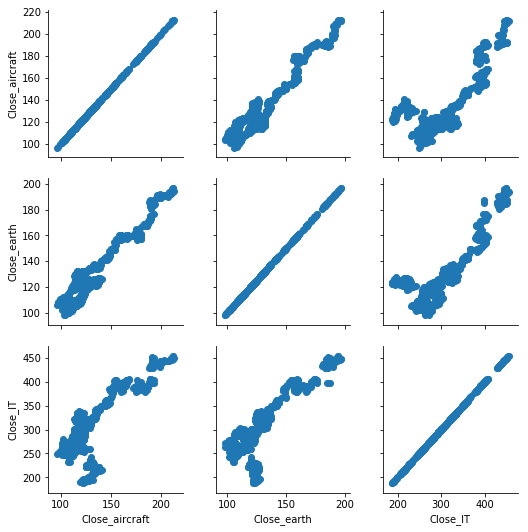

In [25]:
g = sns.PairGrid(stocks_close[['Close_aircraft','Close_earth','Close_IT']])
g.map(plt.scatter)

In [154]:
amzn = stocks[(stocks['Name']=='AMZN') & (stocks['Year'] >= 2012)].reset_index(drop=True)

zero = np.zeros(shape=(13,1))
avg_gain = pd.DataFrame(zero,columns=['daily_return'])
avg_loss = pd.DataFrame(zero,columns=['daily_return'])
    
for i in range(13,amzn.shape[0]):
    window = pd.DataFrame(amzn['daily_return'][i-13:i+1]).reset_index(drop=True)
    avg_gain = avg_gain.append(window[window['daily_return'] > 0].sum() / 4,ignore_index=True)
    avg_loss = avg_loss.append(window[window['daily_return'] < 0].sum().abs() / 4,ignore_index=True)
    
avg_gain.rename(columns={'daily_return': 'avg_gain'},inplace=True)
avg_loss.rename(columns={'daily_return': 'avg_loss'},inplace=True)

chk = avg_gain.join(avg_loss)
amzn = amzn.join(chk)

In [155]:
rsi = pd.DataFrame()
for i in range(0,amzn.shape[0]):
    if amzn['avg_loss'][i]==0:
        rsi_c = pd.DataFrame([100],columns=['RSI'])
        
    else:
        rs = amzn['avg_gain'][i]/amzn['avg_loss'][i]
        if rs == 0:
            rsi_c = pd.DataFrame([0],columns=['RSI'])
        else:
            rsi_c = pd.DataFrame([100-(100/(1+rs))],columns=['RSI'])
        
    rsi = rsi.append(rsi_c)
    
amzn['RSI']=rsi.reset_index(drop=True)

### VIII - Relative Strength Index (RSI)

The relative strength index (RSI) is a momentum indicator developed by noted technical analyst Welles Wilder, that compares the magnitude of recent gains and losses over a specified time period to measure speed and change of price movements of a security. It is primarily used to attempt to identify overbought or oversold conditions in the trading of an asset.

Read more: Relative Strength Index (RSI) https://www.investopedia.com/terms/r/rsi.asp#ixzz58StXoTEU


In [192]:
trace_rsi = go.Scatter(
                x=amzn.Date,
                y=amzn.RSI,
                name = "AMZN",
                opacity = 0.8)
data = [trace_rsi]

layout = dict(
    title = "RSI - Amazon",
    yaxis = dict(title = 'RSI Index'),
    xaxis = dict( title = 'Date',
        range = ['2012-01-01','2017-12-29']),
    shapes = [  {
                    'type': 'line',
                    'x0': '2012-01-01',
                    'y0': 30,
                    'x1': '2017-12-29',
                    'y1': 30,
                    'line': {'color': 'rgb(50, 171, 96)',
                                'width': 4,
                                'dash': 'dashdot'
                            }
                 },
                {
                    'type': 'line',
                    'x0': '2012-01-01',
                    'y0': 70,
                    'x1': '2017-12-29',
                    'y1': 70,
                    'line': {'color': 'rgb(50, 171, 96)',
                                'width': 4,
                                'dash': 'dashdot'
                            }
                 },
        
              ]
    )

fig = dict(data=data, layout=layout)
iplot(fig)

In [162]:
apple = stocks[stocks['Name'] == 'AAPL']
apple['MA21d'] = np.round(apple['Close'].rolling(window = 21, center = False).mean(), 2)
apple['STD'] = np.round(apple['Close'].rolling(window = 21, center = False).std(), 2)
apple['up_bound'] = apple['MA21d']+apple['STD']
apple['low_bound'] = apple['MA21d']-apple['STD']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

### IX - BOWLINGER BAND

The price of the stock is bracketed by an upper and lower band along with a 21-day simple moving average. When the bands come close together, constricting the moving average, it is called a squeeze. A squeeze signals a period of low volatility and is considered by traders to be a potential sign of future increased volatility and possible trading opportunities. Conversely, the wider apart the bands move, the more likely the chance of a decrease in volatility and the greater the possibility of exiting a trade.

The closer the prices move to the upper band, the more overbought the market, and the closer the prices move to the lower band, the more oversold the market.

Read more: Bollinger Band® https://www.investopedia.com/terms/b/bollingerbands.asp#ixzz58SrhZ245


In [188]:
trace_apple = go.Scatter(
                x=apple[apple['Year']==2017].Date,
                y=apple[apple['Year']==2017].Close,
                name = "AAPL",
                opacity = 1.0,line = {'color': 'rgb(220, 220, 10)',
                        'width': 3})

trace_MA21ad = go.Scatter(
                x=apple[apple['Year']==2017].Date,
                y=apple[apple['Year']==2017].MA21d,
                name = "MA_21d",
                opacity = 0.9,
                line = {'color': 'rgb(50, 90, 170)',
                        'width': 1,
                        'dash': 'dot'})

trace_up = go.Scatter(
                x=apple[apple['Year']==2017].Date,
                y=apple[apple['Year']==2017].up_bound,
                name = "Upper Bound",
                opacity = 0.7,
                line = {'color': 'rgb(10, 170, 10)',
                        'width': 2,
                        'dash': 'dashdot'})

trace_low = go.Scatter(
                x=apple[apple['Year']==2017].Date,
                y=apple[apple['Year']==2017].low_bound,
                name = "Lower Bound",
                opacity = 0.9,
                line = {'color': 'rgb(170, 10, 10)',
                        'width': 2,
                        'dash': 'dashdot'})

data = [trace_apple,trace_MA21ad,trace_up,trace_low]

layout = {
    'title' : "Bollinger Band - Apple Inc. (2017)",
    'yaxis' : {'title' : 'Stock Close-value'},
    'xaxis' : {'title': 'Date',
              'range' : ['2017-01-03','2017-12-29']}
        
    }

fig = dict(data=data, layout=layout)
iplot(fig)

### X - Comparing Closing Value and Trading Volume together

In [197]:
compare = google.pivot_table(values=['Close','High','Volume'], index=['Name','Year'],aggfunc='mean').reset_index()

In [204]:
trace_close = go.Scatter(
                x=compare.Year,
                y=compare.Close,
                name = "AAPL-Close",
                opacity = 1.0,line = {'color': 'rgb(220, 50, 50)',
                        'width': 1})

trace_volume = go.Scatter(
                x=compare.Year,
                y=compare.Volume,
                yaxis='y2',
                name = "AAPL-Volume",
                opacity = 1.0,
                line = {'color': 'rgb(50, 220, 50)',
                        'width': 1}
                )

data = [trace_close,trace_volume]

layout = {
    'title' : "Volume and Close - Google ",
    'yaxis' : {'title' : 'Stock Close-value'},
    'yaxis2' : {'title' : 'Volume',
               'overlaying': 'y',
                'side': 'right'},
    
    'xaxis' : {'title': 'Year',
              'range' : [2006,2017]}
        
    }

fig = dict(data=data, layout=layout)
iplot(fig)

#### Eventhough the google stock-price increased over the years, but the trading volume decreased (which is expected as the stock-price increases, the purchasing population decreases)